# <center> Projeto 02 - Unidade II </center>

Seja o sistema dinâmico dado pela seguinte função não linear:

$$
y[n] = f\left(y[n - 1],\, y[n - 2],\, u[n],\, u[n - 1]\right)
$$

cujo conjunto entrada / saídas é apresentado na tabela *dados.txt*. Implemente um identificador via **Método dos Mínimos Quadrados** e um filtro utilizando **funções no domínio dos complexos**. Em seguida, compare os resultados obtidos utilizando como métricas o **Erro Médio Quadrático** e o **Coeficiente de Correlação de Pearson** (ver Lab 04). Apresente conclusões.

## Introdução
---
Olá, professor! Sou Marcos Aurélio Tavares Filho! Este arquivo contém a minha solução para o projeto dois com o objetivo de ser a nota da Unidade 02 de Computação Numérica.

---

## Organização
---
Ele está organizado da seguinte maneira:
- Importação: contém as bibliotecas e arquivos que são necessários para o código.

    - Numpy: cálculos de matrizes, pseudo-inversa e regressão linear;

    - Matplotlib: plotar os gráficos;

    - Scipy: cálculo do coeficiente de Pearson.

- Método dos Mínimos Quadrados (MMQ): mostra o ajuste dos dados via MMQ.
    
    - Fatores que são mostrados: gráfico do ajuste do MMQ, coeficiente de Pearson, mínimo erro quadrático (MSE), regressão linear entre o previsto e o real.


- Funções complexas: mostra o ajuste dos dados via funções complexas.
    
    - Fatores que são mostrados: gráfico do ajuste das funções complexas, estabelecimento de janela do filtro, coeficiente de Pearson, mínimo erro quadrático (MSE), regressão linear entre o previsto e o real.

- Conclusões: avaliação de qual método é mais adequado para o ajuste das curvas e retomada do trabalho.

---

## Importação

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import pinv
from scipy.stats import pearsonr

**Observação: para utilizar o código abaixo, é necessário montar o drive e substituir '/content/drive/MyDrive/cn/dados.txt' pelo caminho do seu arquivo de dados**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


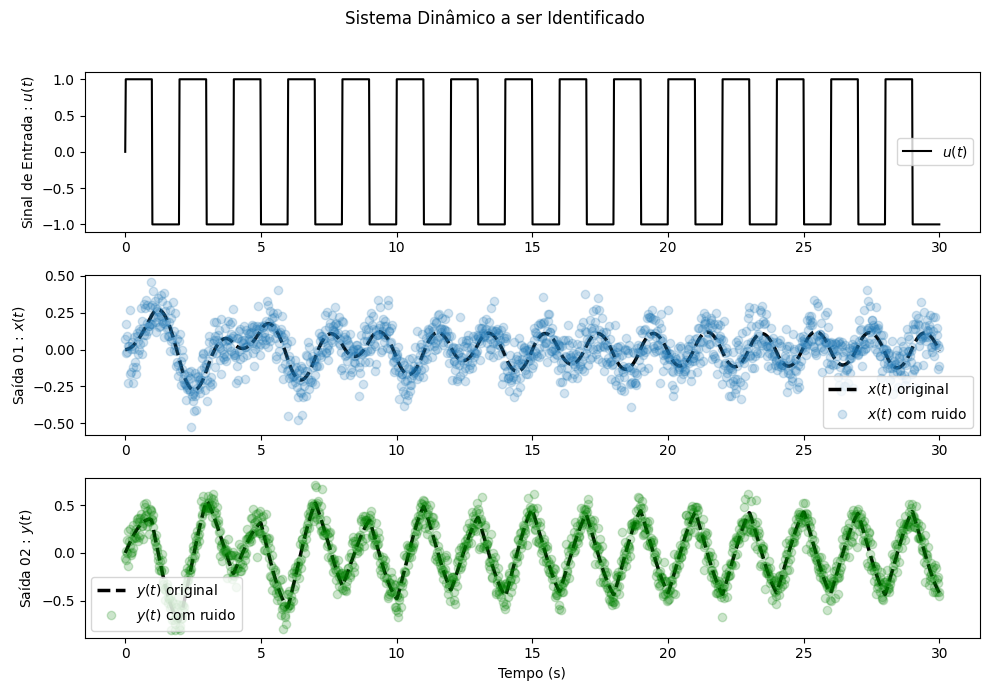

In [3]:
data = np.loadtxt('/content/drive/MyDrive/cn/dados.txt', delimiter=',', skiprows=1)

t = data[:, 0]
u = data[:, 1]
x = data[:, 2]
y = data[:, 3]
x1 = data[:, 4]
y1 = data[:, 5]

# Resultados da simulacao - dados pelo professor
plt.figure(figsize=(10, 7))
plt.subplot(3, 1, 1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## Métodos dos Minímos Quadrados

Ciente do enunciado da questão, sabe-se que:
$$
x_n = f\left(x_{n - 1},\, x_{n - 2},\, u_{n},\, u_{n - 1}\right) \\
y_n = f\left(y_{n - 1},\, y_{n - 2},\, u_{n},\, u_{n - 1}\right)
$$

Em termos de um ajuste de curva, escrevi $x_n$ e $y_n$ como:
$$
x_n = w_{0x} \cdot x_{n-2} + w_{1x} \cdot x_{n-1} + w_{2x} \cdot u_{n} + w_{3x} \cdot u_{n-1} \\
y_n = w_{0y} \cdot y_{n-2} + w_{1y} \cdot y_{n-1} + w_{2y} \cdot u_{n} + w_{3y} \cdot u_{n-1}
$$

Ou, em uma equação matricial:
$$
x_n = Mx_{n\times4} \cdot wx_{4\times1} \\
y_n = My_{n\times4} \cdot wy_{4\times1}
$$

Em que:
$$
pinv(Mx_{n\times4}) \cdot x_n = wx_{4\times1} \\
pinv(My_{n\times4}) \cdot y_n = wy_{4\times1} \\
$$

Feita essa análise, pude achar os pesos $w$ de cada saída através das pseudo-inversas de Mx e My.

Observações sobre o código: insiro zeros no início dos vetores das entradas e saídas que contém n-1 e n-2 porque no instante 0 não existe tempo anterior, assim optei por zerar para poder prosseguir com o projeto conforme mostrado em sala de aula.

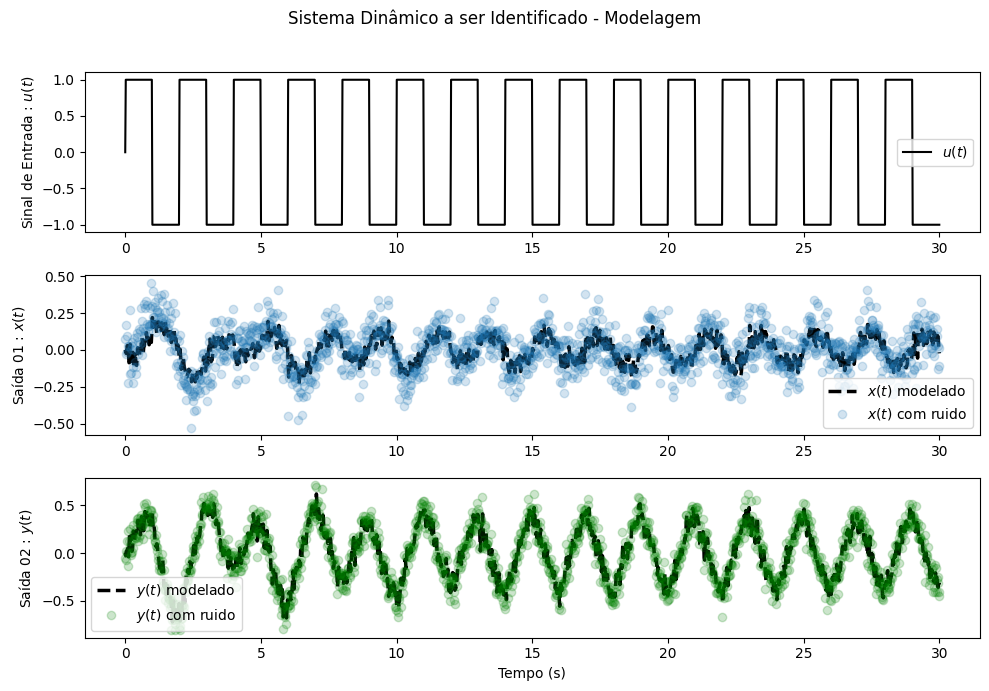

In [5]:
# definindo os vetores para criar a matriz
y = np.array(y) # y[n]
yn1 = np.insert(y[:-1], 0, [0]) # y[n-1]
yn2 = np.insert(y[:-2], 0, [0,0]) # y[n-2]

x = np.array(x)
xn1 = np.insert(x[:-1], 0, [0]) # y[n-1]
xn2 = np.insert(x[:-2], 0, [0,0]) # y[n-2]

u = np.array(u) # u[n]
un1 = np.insert(u[:-1], 0, [0]) # u[n-1]

# debugando se inseri corretamente
# y
# print(y)
# print(yn1)
# print(yn2)
# x
# print(x)
# print(xn1)
# print(xn2)
# u
# print(u)
# print(un1)

# matriz com os vetores coluna
matriz_x = np.column_stack((xn2, xn1, u, un1))
matriz_y = np.column_stack((yn2, yn1, u, un1))

# debugando para ver se a matriz coluna foi formada corretamente
# print(matriz_x)
# print(matriz_y)

# ponderadores
w_x = pinv(matriz_x)@x
w_y = pinv(matriz_y)@y

# debungando os ponderadores
# print(w_x)
# print(w_y)

# prevendo com base nas entradas e saidas anteriores
x_pred_mmq = w_x[0]*xn2 + w_x[1]*xn1 + w_x[2]*u + w_x[3]*un1
y_pred_mmq = w_y[0]*yn2 + w_y[1]*yn1 + w_y[2]*u + w_y[3]*un1

# graficos - peguei a estrutura do professor
plt.figure(figsize=(10, 7))
# entrada
plt.subplot(3,1,1)
plt.plot(t, u, label='$u(t)$', color='k')
plt.ylabel('Sinal de Entrada : $u(t)$')
plt.legend()

# saida X
plt.subplot(3,1,2)
plt.plot(t, x_pred_mmq, '--k', lw = 2.5, label='$x(t)$ modelado')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

# saida Y
plt.subplot(3,1,3)
plt.plot(t, y_pred_mmq, '--k', lw = 2.5, label='$y(t)$ modelado')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()

plt.suptitle('Sistema Dinâmico a ser Identificado - Modelagem')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### MMQ: Erro Médio Quadrático e Coeficiente de Pearson

Nesta seção, dada a previsão do MMQ, eu calculei os coeficientes de Pearson e o erro médio quadrático para ter métricas de comparação e poder, na conclusão, comparar os métodos.

MMQ - O RMSE do modelo em X sera: 0.1144325620393233 e em Y: 0.12424742513730908, como ambos sao menor que 1, o modelo eh considerado relativamente bom.

Coeficiente de Pearson para x: 0.6087126414604448, y: 0.9106266884256319.



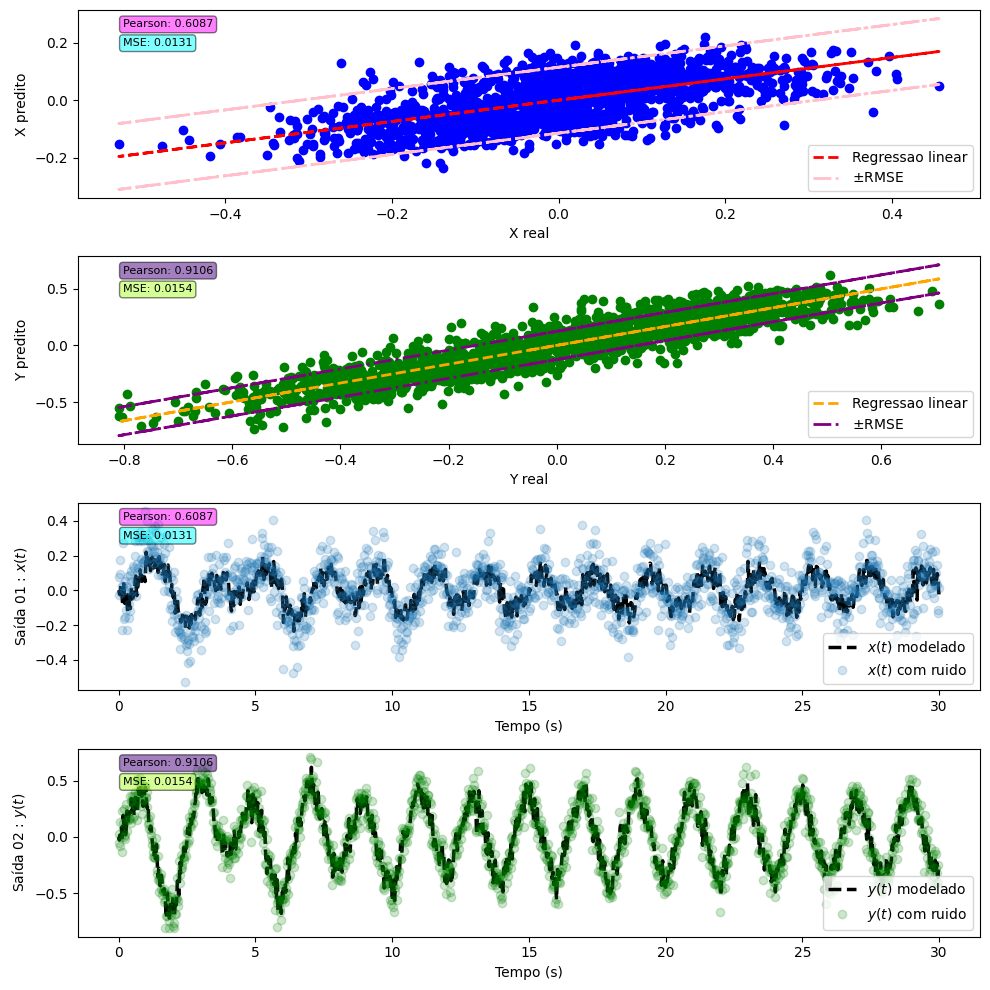

In [6]:
# calculando o erro quadrático do MMQ
mse_x_mmq = np.mean((x-x_pred_mmq)**2)
rmse_x_mmq = np.sqrt(mse_x_mmq)

mse_y_mmq = np.mean((y-y_pred_mmq)**2)
rmse_y_mmq = np.sqrt(mse_y_mmq)

print(f'MMQ - O RMSE do modelo em X sera: {rmse_x_mmq} e em Y: {rmse_y_mmq}, como ambos sao menor que 1, o modelo eh considerado relativamente bom.\n')

# coeficiente de Pearson
coeficiente_r_x, p_valor_x = pearsonr(x, x_pred_mmq)
coeficiente_r_y, p_valor_y = pearsonr(y, y_pred_mmq)

print(f'Coeficiente de Pearson para x: {coeficiente_r_x}, y: {coeficiente_r_y}.\n')

# Regressoes lineares
a_x, b_x = np.polyfit(x, x_pred_mmq, 1)
a_y, b_y = np.polyfit(y, y_pred_mmq, 1)

reta_x = a_x*x + b_x
reta_y = a_y*y + b_y

# graficos - peguei a estrutura do professor
plt.figure(figsize=(10, 10))

# saida X - regressao linear
plt.subplot(4,1,1)
plt.scatter(x, x_pred_mmq, color='blue')

plt.plot(x, reta_x, '--', color='red', label=f'Regressao linear', linewidth=2)
plt.plot(x, reta_x + rmse_x_mmq, '-.', color='pink', label=r'$\pm$RMSE', linewidth=2)
plt.plot(x, reta_x - rmse_x_mmq, '-.', color='pink', linewidth=2)

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_x:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='fuchsia', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_x_mmq:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))

plt.xlabel('X real')
plt.ylabel('X predito')

plt.legend()

# saida Y - regressao linear
plt.subplot(4,1,2)
plt.scatter(y, y_pred_mmq, color='green' )

plt.plot(y, reta_y, '--', color='orange', label=f'Regressao linear', linewidth=2)
plt.plot(y, reta_y + rmse_y_mmq, '-.', color='purple', label=r'$\pm$RMSE', linewidth=2)
plt.plot(y, reta_y - rmse_y_mmq, '-.', color='purple', linewidth=2)

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_y:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='indigo', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_y_mmq:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='greenyellow', alpha=0.5))

plt.xlabel('Y real')
plt.ylabel('Y predito')
plt.legend()


# saida X
plt.subplot(4,1,3)
plt.plot(t, x_pred_mmq, '--k', lw = 2.5, label='$x(t)$ modelado')
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 01 : $x(t)$')

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_x:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='fuchsia', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_x_mmq:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))
plt.legend()

# saida Y
plt.subplot(4,1,4)
plt.plot(t, y_pred_mmq, '--k', lw = 2.5, label='$y(t)$ modelado')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_y:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='indigo', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_y_mmq:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='greenyellow', alpha=0.5))
plt.legend()


plt.tight_layout()
plt.show()

###

## Funções Complexas

Nesta seção, utilizei funções complexas para filtrar o sinal ruídoso. Para isso, foi necessário estabelecer um filtro. O método utilizado foi o experimental, saí alterando a janela até chegar em algo que representasse suficientemente bem o sinal real (30). Além disso, encontrei o valor do filtro (2) de forma semelhante, em especial, o procedimento foi o seguinte: após achar uma janela adequada, saí variando de 0 a 3 com acrésimos de 0.1 até achar o 2 como valor satisfatório.

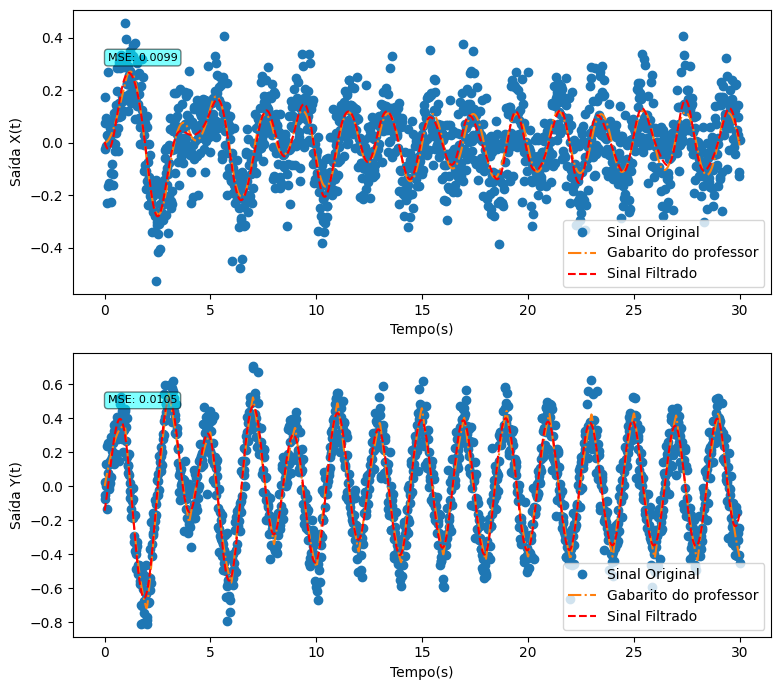

In [7]:
# tamanho para criar uma matriz de transicao
Nx = len(x)
Ny = len(y)

# matriz de transicao para os complexos de x
gx = np.exp(-2j * np.pi / Nx)
Wx = np.array([[gx**(m*n) for n in range(Nx)] for m in range(Nx)]) / np.sqrt(Nx)

# matriz de transicao para os complexos de y
gy = np.exp(-2j * np.pi / Ny)
Wy = np.array([[gy**(m*n) for n in range(Ny)] for m in range(Ny)]) / np.sqrt(Ny)

# transformando em complexo
X = Wx @ x
Y = Wy @ y

# definicao do filtro no dominio dos complexos
Hx = np.zeros(Nx)
Hy = np.zeros(Ny)

Hx[:30] = 2.0
Hy[:30] = 2.0

# aplicando o filtro
x_comp = Hx * X
y_comp = Hy * Y

# aplicacao da hermitiana
x_filter = (Wx.conj().T) @ x_comp
y_filter = (Wy.conj().T) @ y_comp

# calculando o mse
mse_x_comp = np.mean((x-x_filter.real)**2)
mse_y_comp = np.mean((y-y_filter.real)**2)

# debugando os erros
# print(f'EMQX: {mse_x_comp.real}, EMQY:{mse_y_comp.real}')

# graficos
plt.figure(figsize=(8, 7))

# saida X
plt.subplot(2,1,1)
plt.plot(t, x, 'o', label = 'Sinal Original')
# descomente a linha abaixo para fins de comparacao :)
plt.plot(t, x1, '-.', label = 'Gabarito do professor')
plt.plot(t, x_filter.real, '--r', label = 'Sinal Filtrado')
plt.xlabel('Tempo(s)')
plt.ylabel('Saída X(t)')
plt.text(0.05, 0.85, f'MSE: {mse_x_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))
plt.legend()

# saida Y
plt.subplot(2,1,2)
plt.plot(t, y, 'o', label = 'Sinal Original')
# descomente a linha abaixo para fins de comparacao :)
plt.plot(t, y1, '-.', label = 'Gabarito do professor')
plt.plot(t, y_filter.real, '--r', label = 'Sinal Filtrado')
plt.xlabel('Tempo(s)')
plt.ylabel('Saída Y(t)')
plt.text(0.05, 0.85, f'MSE: {mse_y_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))
plt.legend()

plt.tight_layout()
plt.show()

### Complexo: Erro Médio Quadrático e Coeficiente de Pearson

Complexos - O RMSE do modelo em X sera: 0.09960141327620566 e em Y: 0.09960141327620566, como ambos sao menor que 1, o modelo eh considerado relativamente bom.

Coeficiente de Pearson para x: 0.723469196304275, y: 0.9401875490441899.



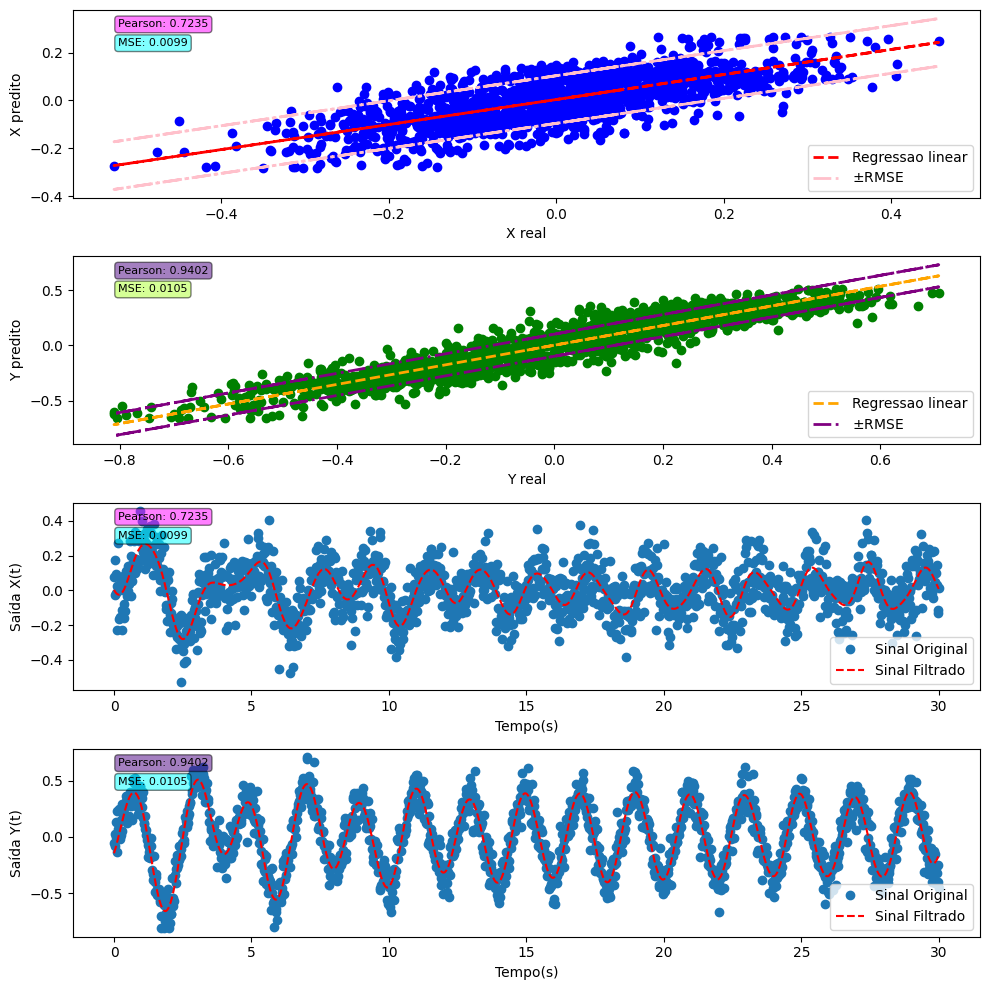

In [8]:
# coeficiente de Pearson
coeficiente_r_x_comp, _ = pearsonr(x, x_filter.real)
coeficiente_r_y_comp, _ = pearsonr(y, y_filter.real)

# regressoes lineares
a_x_comp, b_x_comp = np.polyfit(x, x_filter.real, 1)
a_y_comp, b_y_comp = np.polyfit(y, y_filter.real, 1)

# retas
reta_x_comp = a_x_comp*x + b_x_comp
reta_y_comp = a_y_comp*y + b_y_comp

# raiz do erro medio quadrado
rmse_x_comp = np.sqrt(mse_x_comp.real)
rmse_y_comp = np.sqrt(mse_x_comp.real)

print(f'Complexos - O RMSE do modelo em X sera: {rmse_x_comp} e em Y: {rmse_y_comp}, como ambos sao menor que 1, o modelo eh considerado relativamente bom.\n')
print(f'Coeficiente de Pearson para x: {coeficiente_r_x_comp}, y: {coeficiente_r_y_comp}.\n')

# graficos
plt.figure(figsize=(10, 10))

# saida X - regressao linear
plt.subplot(4,1,1)
plt.scatter(x, x_filter.real, color='blue')

plt.plot(x, reta_x_comp, '--', color='red', label=f'Regressao linear', linewidth=2)
plt.plot(x, reta_x_comp + rmse_x_comp, '-.', color='pink', label=r'$\pm$RMSE', linewidth=2)
plt.plot(x, reta_x_comp - rmse_x_comp, '-.', color='pink', linewidth=2)

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_x_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='fuchsia', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_x_comp.real:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))

plt.xlabel('X real')
plt.ylabel('X predito')

plt.legend()

# saida Y - regressao linear
plt.subplot(4,1,2)
plt.scatter(y, y_filter.real, color='green' )

plt.plot(y, reta_y_comp, '--', color='orange', label=f'Regressao linear', linewidth=2)
plt.plot(y, reta_y_comp + rmse_y_comp, '-.', color='purple', label=r'$\pm$RMSE', linewidth=2)
plt.plot(y, reta_y_comp - rmse_y_comp, '-.', color='purple', linewidth=2)

plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_y_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='indigo', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_y_comp.real:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='greenyellow', alpha=0.5))

plt.xlabel('Y real')
plt.ylabel('Y predito')
plt.legend()


# saida X
plt.subplot(4,1,3)
plt.plot(t, x, 'o', label = 'Sinal Original')
plt.plot(t, x_filter.real, '--r', label = 'Sinal Filtrado')
plt.xlabel('Tempo(s)')
plt.ylabel('Saída X(t)')
plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_x_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='fuchsia', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_x_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))
plt.legend()

# saida Y
plt.subplot(4,1,4)
plt.plot(t, y, 'o', label = 'Sinal Original')
plt.plot(t, y_filter.real, '--r', label = 'Sinal Filtrado')
plt.xlabel('Tempo(s)')
plt.ylabel('Saída Y(t)')
plt.text(0.05, 0.95, f'Pearson: {coeficiente_r_y_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='indigo', alpha=0.5))
plt.text(0.05, 0.85, f'MSE: {mse_y_comp:.4f}', transform=plt.gca().transAxes,
         fontsize=8, verticalalignment='top',
         bbox=dict(boxstyle="round", facecolor='aqua', alpha=0.5))
plt.legend()

plt.tight_layout()
plt.show()

## Conclusão

Apresentados os ajustes e tendo ciência dos coeficientes pelo métodos:
- Mínimos Quadrados
    - Saída X
      
      - Coeficiente de Pearson: 0,6087
      - Erro Médio Quadrado: 0,0131

    - Saída Y

      - Coeficiente de Pearson: 0,9106
      - Erro Médio Quadrado: 0,0154

- Funções Complexas
    - Saída X
      
      - Coeficiente de Pearson: 0,7235
      - Erro Médio Quadrado: 0,0099

    - Saída Y

      - Coeficiente de Pearson: 0,9402
      - Erro Médio Quadrado: 0,0105

  Percebe-se que **a dispersão dos dados, representado pelo coeficiente de correlação, e o erro apresentam melhores resultados no contexto das funções complexas**. Isso ocorre devido a robustez das funções complexas e a escolha apropriada para a janela e filtro aplicados sobre o sinal no domínio dos complexos.

  Ainda, é importante ressaltar que, apesar da **curva ter sido ajustada melhor para as funções complexas nas condições acima, nem sempre isso irá ocorrer**. Inicialmente, neste projeto, gastei tempo considerável tentando estabelecer uma janela e filtro para a representação do sinal, com uma performance das complexas inferior ao MMQ, com o tempo, porém, e o aumento dos testes, pude estabelecer métricas que preveem o sinal real de forma mais próxima da realidade.

  Dito isso, conclui-se que, para o estabelecido neste projeto, **o melhor ajuste de curva ocorreu quando eu utilizei as funções complexas**.